In [3]:
data = read.csv("./data/mushroom.csv")
data$X = NULL

In [4]:
head(data)

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Poisonous,x,s,n,t,None,f,c,n,k,⋯,s,w,w,p,w,o,p,Buff,s,u
2,Edible,x,s,y,t,Almonds,f,c,b,k,⋯,s,w,w,p,w,o,p,Chocolate,n,g
3,Edible,b,s,w,t,Fishy,f,c,b,n,⋯,s,w,w,p,w,o,p,Chocolate,n,m
4,Poisonous,x,y,w,t,None,f,c,n,n,⋯,s,w,w,p,w,o,p,Buff,s,u
5,Edible,x,s,g,f,Musty,f,w,b,k,⋯,s,w,w,p,w,o,e,Chocolate,a,g
6,Edible,x,y,y,t,Almonds,f,c,b,n,⋯,s,w,w,p,w,o,p,Buff,n,g


In [5]:
nrow(data)

[1] 8124

In [6]:
ncol(data)

[1] 23

In [7]:
summary(data)

    Class            cap.shape         cap.surface         cap.color        
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   bruises              odor           gill.attachment    gill.spacing      
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  gill.size          gill.color        stalk.shape         stalk.root       
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 stalk.surface.above.ring stalk.surface.below.ring stalk.color.above.ring
 L

In [9]:
library(Amelia)

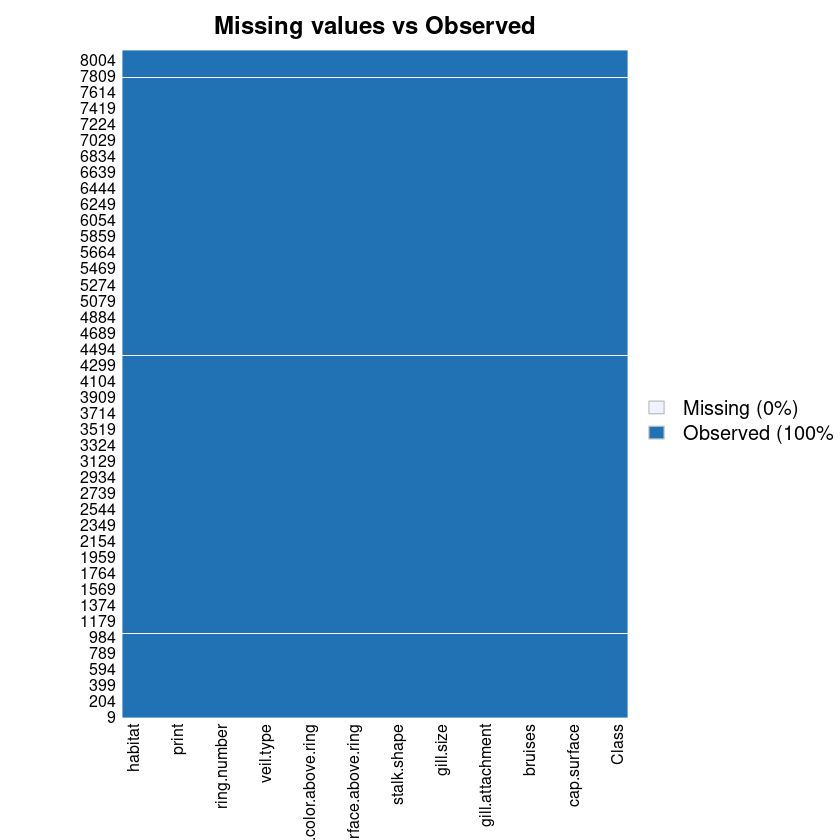

In [10]:
missmap(data, main = "Missing values vs Observed")

In [11]:
table(data$Class)


   Edible Poisonous 
     4208      3916 

> **Nhận xét**
> * Đối với tập dữ liệu này, toàn bộ dữ liệu đều là dữ liệu định danh, nên nếu sử dụng thuật toán Logistic thì ko phù hợp, đổi lại ta nên áp dụng Decision Tree.

In [22]:
library(rpart)

In [23]:
set.seed(42)
trainingRowIndex = sample(1:nrow(data), 0.75*nrow(data))
trainingData = data[trainingRowIndex,]
testData = data[-trainingRowIndex,]

In [25]:
data.tree = rpart(Class ~ cap.shape + cap.surface + cap.color + bruises + 
                  odor + gill.attachment + gill.spacing + gill.size + gill.color + 
                  stalk.shape + stalk.root + stalk.surface.above.ring + 
                  stalk.surface.below.ring + stalk.color.above.ring + 
                  stalk.color.below.ring + veil.type + veil.color + ring.number + 
                  ring.type + print + population + habitat, 
                  data = trainingData, method = 'class')

data.tree

n= 6093 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 6093 2952 Edible (0.51550960 0.48449040)  
  2) odor=Almonds,Fishy,Musty 3230   89 Edible (0.97244582 0.02755418)  
    4) print=Black,Brown,Buff,Chocolate,Green,Purple,White,Yellow 3182   41 Edible (0.98711502 0.01288498) *
    5) print=Orange 48    0 Poisonous (0.00000000 1.00000000) *
  3) odor=Anise,Creosote,Foul,None,Pungent,Spicy 2863    0 Poisonous (0.00000000 1.00000000) *

In [26]:
summary(data.tree)

Call:
rpart(formula = Class ~ cap.shape + cap.surface + cap.color + 
    bruises + odor + gill.attachment + gill.spacing + gill.size + 
    gill.color + stalk.shape + stalk.root + stalk.surface.above.ring + 
    stalk.surface.below.ring + stalk.color.above.ring + stalk.color.below.ring + 
    veil.type + veil.color + ring.number + ring.type + print + 
    population + habitat, data = trainingData, method = "class")
  n= 6093 

          CP nsplit  rel error     xerror        xstd
1 0.96985095      0 1.00000000 1.00000000 0.013214788
2 0.01626016      1 0.03014905 0.03014905 0.003172367
3 0.01000000      2 0.01388889 0.01388889 0.002161770

Variable importance
                    odor                    print               gill.color 
                      26                       19                       16 
stalk.surface.above.ring stalk.surface.below.ring                ring.type 
                      13                       13                       13 

Node number 1: 6093 observa

In [27]:
y_pred = predict(data.tree, testData, type = 'class')
result = data.frame(Predict = y_pred, Actual = testData$Class)

head(result)

,Predict,Actual
,<fct>,<chr>
5,Edible,Edible
6,Edible,Edible
12,Edible,Edible
13,Edible,Edible
17,Edible,Edible
20,Poisonous,Poisonous


In [28]:
1 - mean(y_pred != testData$Class)

[1] 0.9965534

In [33]:
cf = table(y_pred, testData$Class)

cf

           
y_pred      Edible Poisonous
  Edible      1067         7
  Poisonous      0       957

> **Nhận xét**
> * Decision Tree hoạt động cực kì tốt cho tập data này

In [29]:
library(rpart.plot)

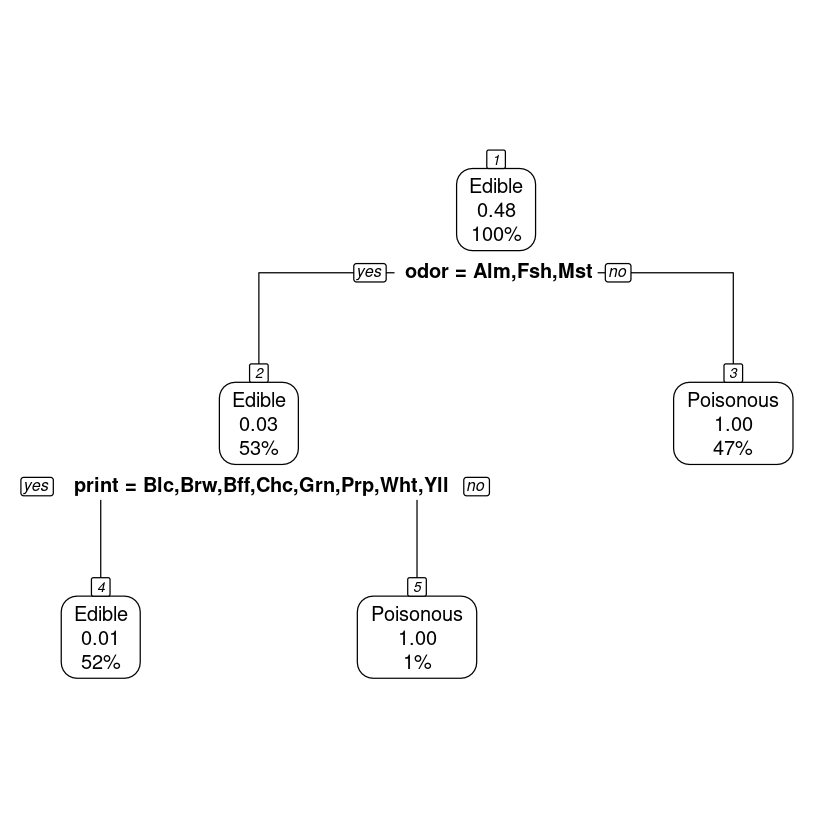

In [32]:
prp(data.tree, type = 2, extra = 'auto', nn = TRUE, branch = 1, varlen = 0, yesno = 2)